MP1 Part 1 - Austin Perales

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
#(1) Read in the image
image = io.imread('car.jpg')

# Image shape
print(f"Image is of type: {type(image)}\n\nThis image has a shape: {image.shape}") 

Image is of type: <class 'numpy.ndarray'>

This image has a shape: (168, 300, 3)


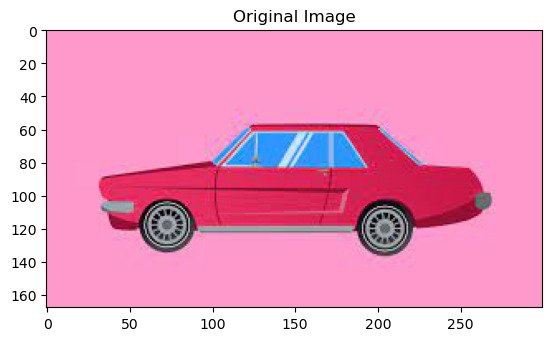

In [3]:
#(2) Plotting the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

In [4]:
#(3) Normalize the image
img_normalized = image / 255

In [5]:
#(4) Reshape the image
pixels_per_channel = image.shape[0] * image.shape[1]

print(f"{pixels_per_channel} pixels per channel")

# Reshape the normalized image such that each column represents one channel
reshaped_image = img_normalized.reshape(pixels_per_channel,3)
print(reshaped_image, reshaped_image.shape)

50400 pixels per channel
[[1.  0.6 0.8]
 [1.  0.6 0.8]
 [1.  0.6 0.8]
 ...
 [1.  0.6 0.8]
 [1.  0.6 0.8]
 [1.  0.6 0.8]] (50400, 3)


In [6]:
#(5) KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)

# Coordinates
print(f"These are the n-dimensional coordinates of the 2 centroids:\n{kmeans.cluster_centers_}")

# Cluster numbers
print(f"These are the cluster number each data point belongs to:\n\n{kmeans.labels_}")

These are the n-dimensional coordinates of the 2 centroids:
[[0.95997804 0.60332812 0.80192925]
 [0.73650066 0.16048027 0.32008527]]
These are the cluster number each data point belongs to:

[0 0 0 ... 0 0 0]


/opt/anaconda3/envs/esomar/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
#(6) Replacing with cluster centroid values
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

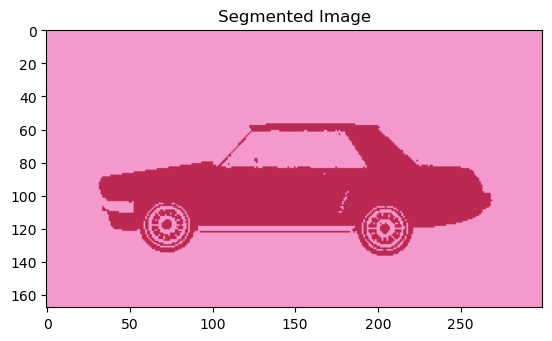

In [8]:
#(7) Reshaping to the original shape
segmented_image = segmented_image.reshape(image.shape)

# Plotting the segmented image
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.show()

Questions:

a) The main difference between the original image and the segmented image is the color differences. There are only two colors on the segmented image, and they are mundane compared to the original. Additionally, the segmented image is much less crisp and 
defined than the original.

b) When changing the numnber of clusters to 4 or 5, more colors appear and the image becomes more well defined. This makes sense if there are more clusters, then there are more colors being used in the segmentation.

c) Image segmentation is the process of finding the averaged or centralized colors in an image and breaking it up in order to be more easily stored or manipulated. This allows us to view a less sophisticated and more basic version of an image, which sacrifices details for simplicity.